## Import library

In [13]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from scipy.stats import skew
from datetime import datetime

In [4]:
# Load data
day_data = pd.read_csv("dataset/day.csv")
hour_data = pd.read_csv("dataset/hour.csv")

In [5]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Cleaning Data

In [7]:
# Periksa missing values
print("Missing values per kolom:\n", day_data.isnull().sum())

# Periksa outlier menggunakan statistik deskriptif
print("Descriptive statistics:\n", day_data.describe())

Missing values per kolom:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Descriptive statistics:
           instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000  

In [8]:
# Cek missing values
missing_values = day_data.isnull().sum()
print("\nMissing values per kolom:")
print(missing_values[missing_values > 0])

# Menampilkan sampel data
print("\nSample data:")
print(day_data.head())


Missing values per kolom:
Series([], dtype: int64)

Sample data:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  


- Tidak ada nilai yang hilang, sehingga semua kolom dapat digunakan untuk analisis.
- Statistik deskriptif menunjukkan rentang nilai untuk setiap variabel, yaitu:
1. cnt (jumlah rental) memiliki rata-rata tertentu, dengan distribusi yang terlihat cukup bervari
2. Variabel numerik lain seperti suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed) juga memiliki distribusi yang bervariasi.

In [7]:
# cek column yang ada pada data
day_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# cek data type masing-masing value
day_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## EDA

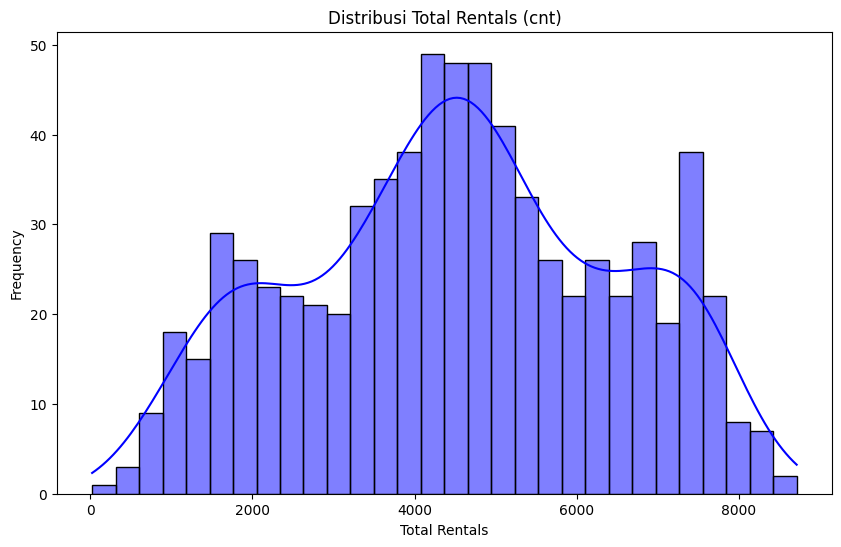

In [9]:
# Menampilkan distribusi data
plt.figure(figsize=(10, 6))
sns.histplot(day_data['cnt'], kde=True, color='blue', bins=30)
plt.title('Distribusi Total Rentals (cnt)')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Menghitung skewness
skewness = skew(day_data['cnt'])
print(f"Skewness dari distribusi 'cnt': {skewness}")

Skewness dari distribusi 'cnt': -0.04725555755362063


1. Nilai mendekati 0: Distribusi data mendekati simetris, yang berarti data hampir seimbang di kedua sisi rata-rata.
2. Negatif: Skewness negatif berarti distribusi memiliki ekor yang sedikit lebih panjang ke sisi kiri. Namun, dalam hal ini, karena nilainya sangat kecil (hampir nol), pengaruh skewness negatif hampir tidak signifikan.

Dengan demikian, distribusi 'cnt' dapat dianggap hampir normal dan tidak memiliki kemiringan yang mencolok baik ke kanan maupun ke kiri.

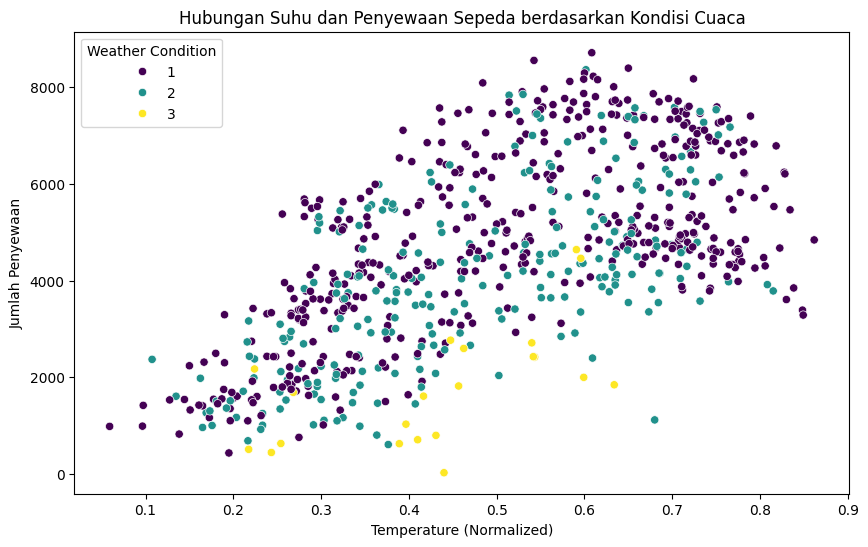

In [11]:
# Hubungan cuaca dengan jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_data, x='temp', y='cnt', hue='weathersit', palette='viridis')
plt.title("Hubungan Suhu dan Penyewaan Sepeda berdasarkan Kondisi Cuaca")
plt.xlabel("Temperature (Normalized)")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Weather Condition")
plt.show()

1. Data menunjukkan pola distribusi yang tersebar luas pada suhu rendah, terutama untuk Weather Condition 1 dan 2. Namun, pada suhu yang lebih tinggi, jumlah penyewaan lebih terpusat pada nilai tinggi.
2. Ini menunjukkan bahwa selain suhu, kondisi cuaca memiliki pengaruh signifikan terhadap keputusan pengguna untuk menyewa sepeda.

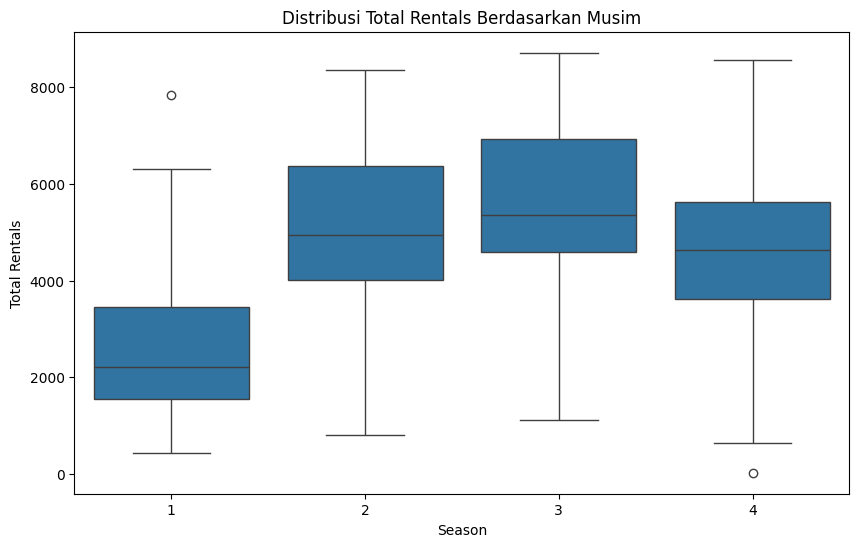

In [18]:
# Distribusi pengguna berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_data)
plt.title('Distribusi Total Rentals Berdasarkan Musim')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()

1. Musim panas dan musim gugur (season 2 dan 3) memiliki jumlah rental yang lebih tinggi dibanding musim dingin (season 1). Hal ini di karenakan cuaca yang lebih nyaman mampu mendorong orang untuk menggunakan sepeda.
2. Musim dingin (season 1) memiliki jumlah rental yang lebih rendah, kemungkinan karena suhu rendah dan cuaca ekstrem membuat orang menjadi tidak berkeinginan untuk bersepeda.

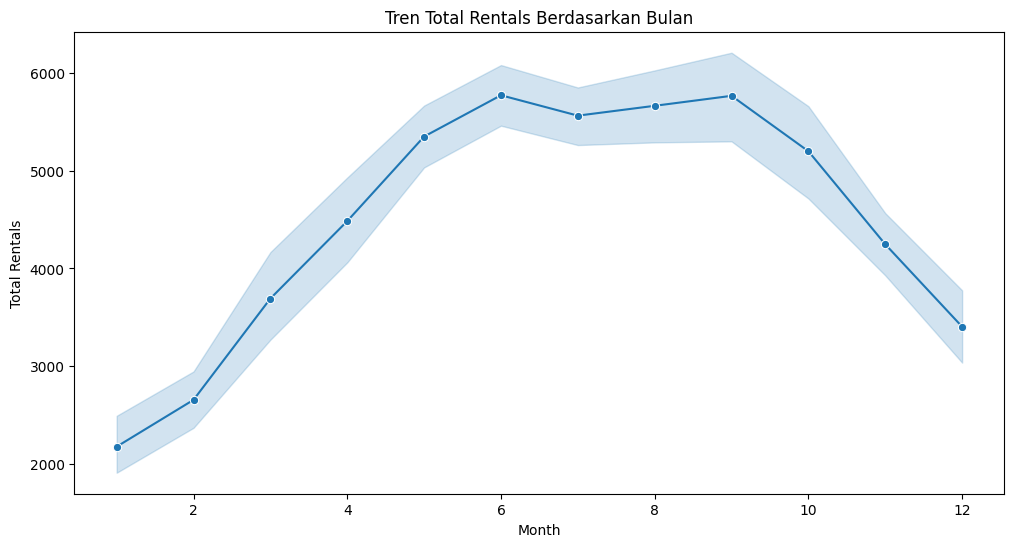

In [19]:
# Tren jumlah pengguna harian berdasarkan bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=day_data, marker='o')
plt.title('Tren Total Rentals Berdasarkan Bulan')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.show()

1. Terdapat pola musiman di mana rental sepeda meningkat pada bulan-bulan musim panas (Mei hingga Oktober) dan menurun selama musim dingin (November hingga Februari).
Peningkatan jumlah rental ini mungkin disebabkan oleh cuaca yang lebih hangat dan lebih banyak aktivitas luar ruangan selama musim panas.

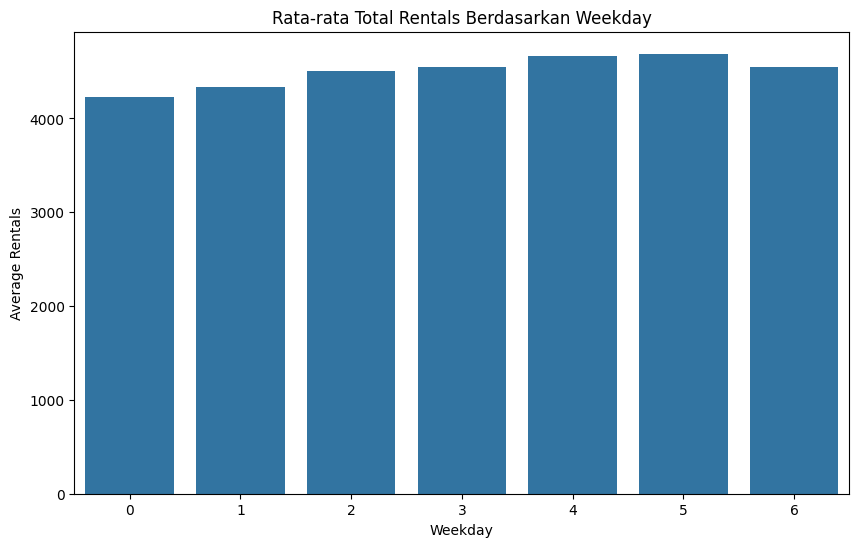

In [20]:
# Analisis kategori hari kerja (weekday)
weekday_counts = day_data.groupby('weekday')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=weekday_counts)
plt.title('Rata-rata Total Rentals Berdasarkan Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Rentals')
plt.show()

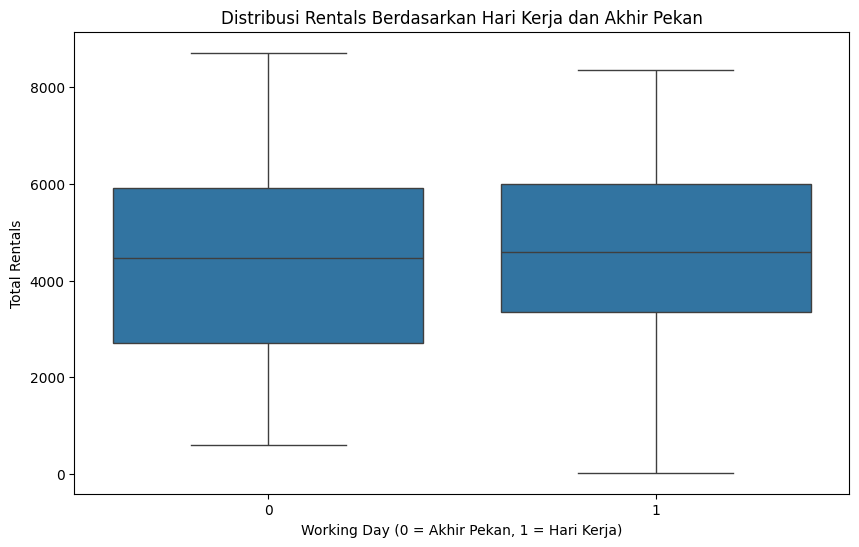

In [22]:
# Tren jumlah pengguna pada hari kerja dan akhir pekan
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_data)
plt.title('Distribusi Rentals Berdasarkan Hari Kerja dan Akhir Pekan')
plt.xlabel('Working Day (0 = Akhir Pekan, 1 = Hari Kerja)')
plt.ylabel('Total Rentals')
plt.show()

1. Rata-rata jumlah rental lebih tinggi pada hari kerja, yang menunjukkan bahwa sepeda sering digunakan untuk perjalanan kerja atau keperluan sehari-hari.
2. Pada akhir pekan, jumlah rental lebih rendah, Hal ini mungkin dikarenakan penggunaan sepeda lebih untuk kebutuhan rekreasi dan olahraga.

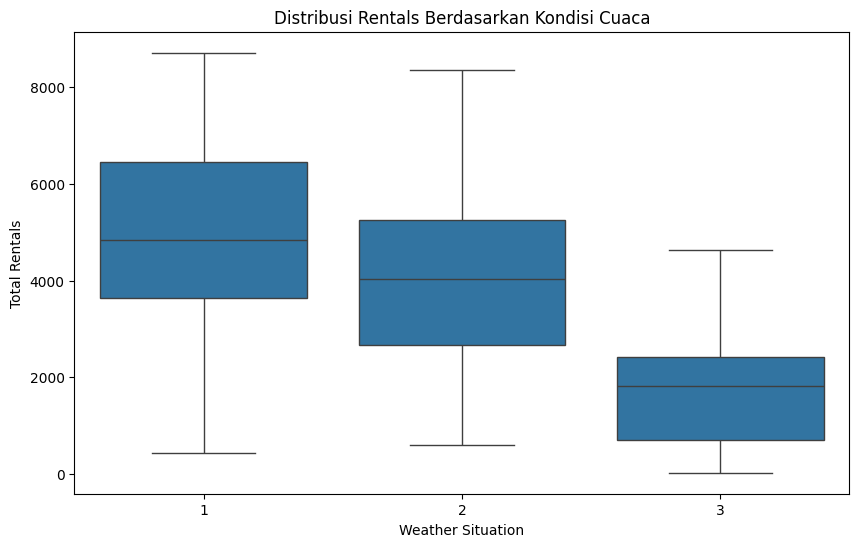

In [23]:
# Analisis dampak cuaca terhadap jumlah pengguna
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_data)
plt.title('Distribusi Rentals Berdasarkan Kondisi Cuaca')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')
plt.show()

1. Kondisi cuaca yang lebih baik (weathersit = 1) memiliki jumlah rental yang lebih tinggi dibandingkan cuaca buruk (weathersit = 3 atau lebih tinggi).
2. Cuaca buruk seperti hujan atau salju cenderung menurunkan penggunaan sepeda secara signifikan.

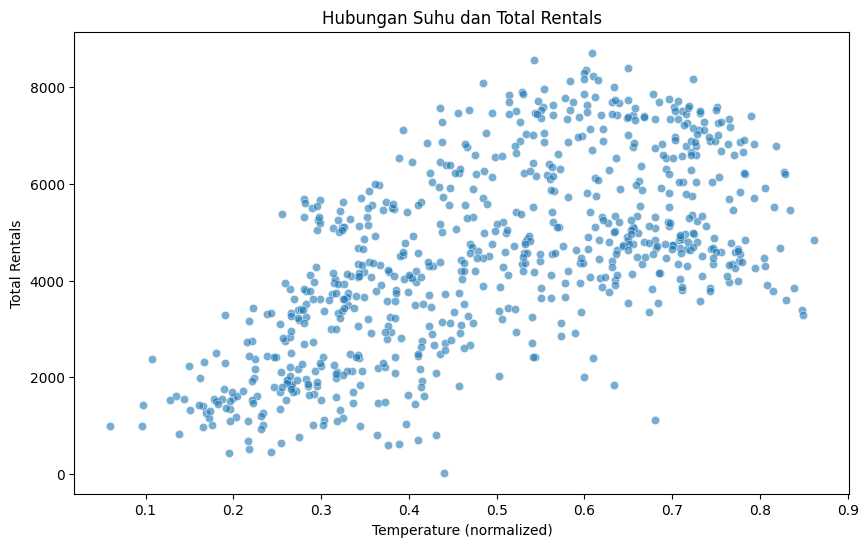

In [24]:
# Analisis dampak suhu terhadap jumlah pengguna
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data, alpha=0.6)
plt.title('Hubungan Suhu dan Total Rentals')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Total Rentals')
plt.show()

1. Scatter plot menunjukkan hubungan positif antara suhu (temp) dan jumlah rental. Ketika suhu meningkat, jumlah rental juga meningkat, namun hanya sampai pada titik tertentu saja.
2. Setelah suhu terlalu tinggi, jumlah rental mungkin mulai menurun.

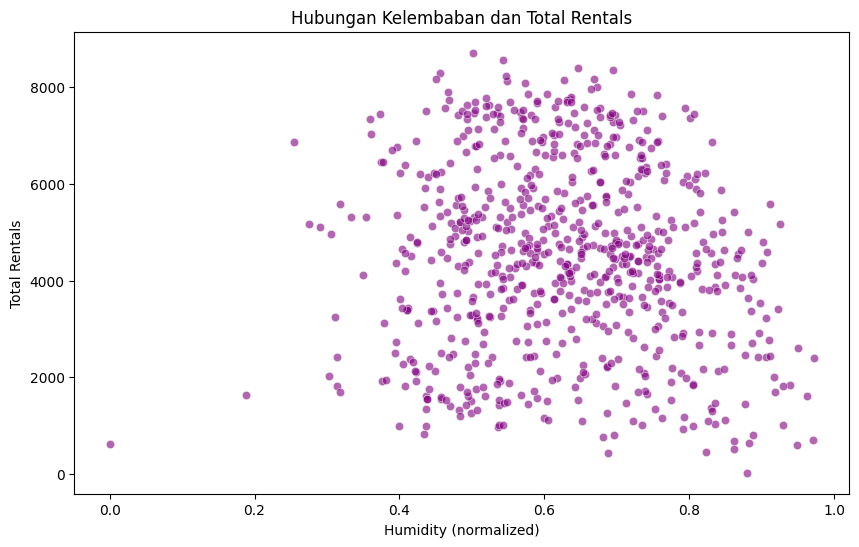

In [25]:
# Dampak kelembaban (humidity) terhadap jumlah pengguna
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=day_data, alpha=0.6, color='purple')
plt.title('Hubungan Kelembaban dan Total Rentals')
plt.xlabel('Humidity (normalized)')
plt.ylabel('Total Rentals')
plt.show()

Scatter plot menunjukkan bahwa rental sepeda cenderung lebih rendah pada tingkat kelembaban (hum) yang sangat tinggi. Kelembaban bisa membuat orang merasa tidak nyaman untuk bersepeda.

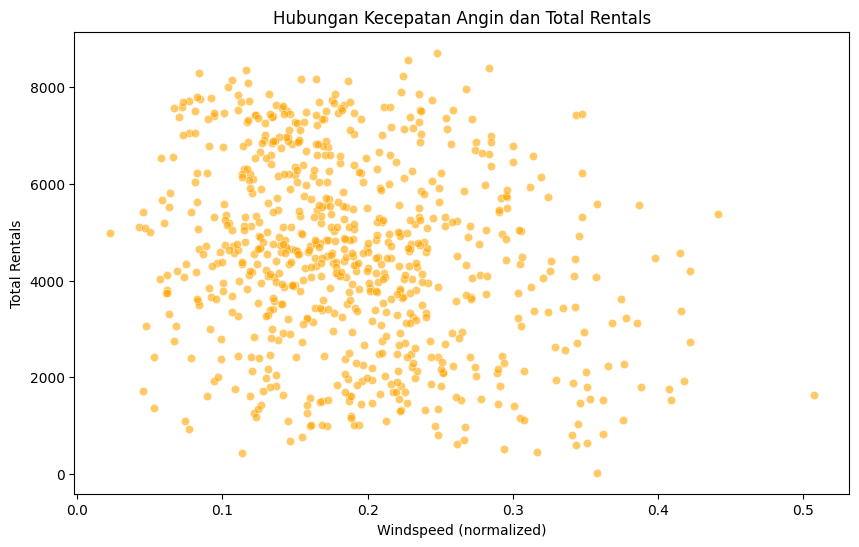

In [26]:
# Dampak kecepatan angin (windspeed) terhadap jumlah pengguna
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=day_data, alpha=0.6, color='orange')
plt.title('Hubungan Kecepatan Angin dan Total Rentals')
plt.xlabel('Windspeed (normalized)')
plt.ylabel('Total Rentals')
plt.show()

Scatter plot menunjukkan bahwa kecepatan angin yang lebih tinggi (windspeed) sedikit mengurangi jumlah rental. Orang mungkin menghindari bersepada saat angin kencang karena lebih susah dan berbahaya.

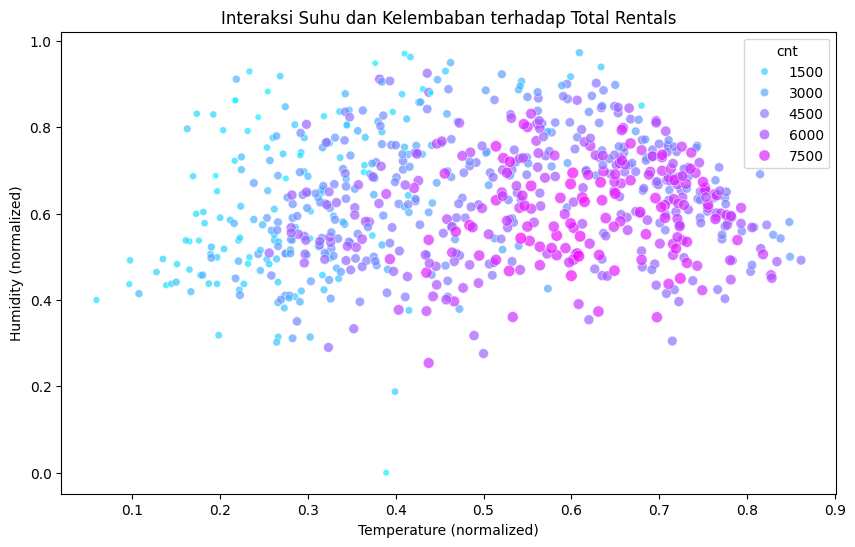

In [29]:
# Visualisasi interaksi suhu dan kelembaban terhadap jumlah rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='hum', size='cnt', hue='cnt', data=day_data, alpha=0.7, palette='cool')
plt.title('Interaksi Suhu dan Kelembaban terhadap Total Rentals')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Humidity (normalized)')
plt.show()

Scatter plot menunjukkan bahwa jumlah rental yang tinggi sering terjadi pada suhu yang sedang hingga hangat dengan kelembaban yang tidak terlalu tinggi.
Kondisi ini menunjukkan cuaca yang ideal untuk aktivitas luar ruangan.

In [30]:
# Analisis data kategorikal
categorical_columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    print(f"\nDistribusi nilai pada kolom {col}:")
    print(day_data[col].value_counts())


Distribusi nilai pada kolom season:
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

Distribusi nilai pada kolom mnth:
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64

Distribusi nilai pada kolom holiday:
holiday
0    710
1     21
Name: count, dtype: int64

Distribusi nilai pada kolom weekday:
weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

Distribusi nilai pada kolom workingday:
workingday
1    500
0    231
Name: count, dtype: int64

Distribusi nilai pada kolom weathersit:
weathersit
1    463
2    247
3     21
Name: count, dtype: int64


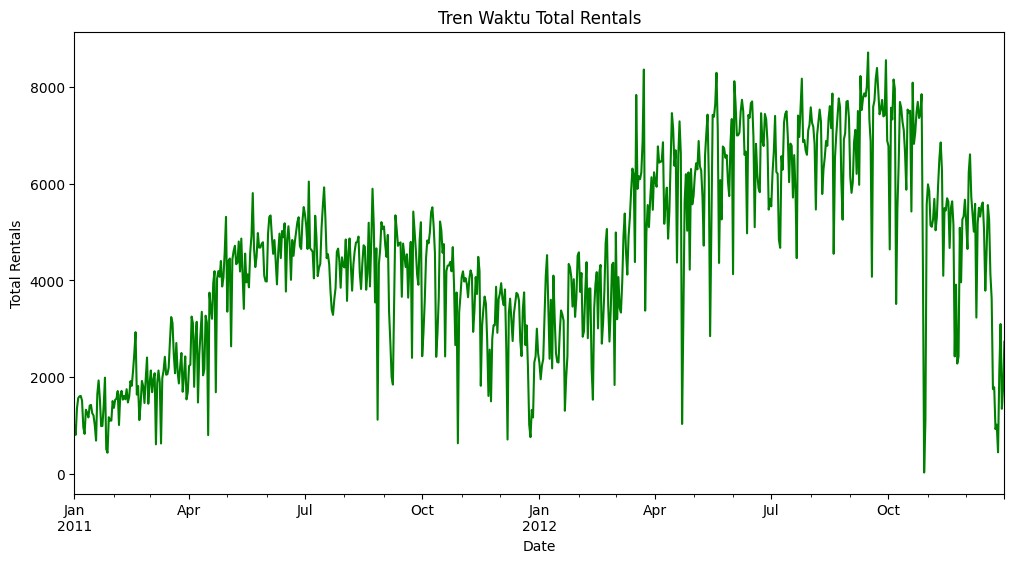

In [32]:
# Analisis tren musiman
day_data['date'] = pd.to_datetime(day_data['dteday'])  # Pastikan ada kolom 'dteday' untuk analisis ini
day_data.set_index('date', inplace=True)
day_data['cnt'].plot(figsize=(12, 6), title='Tren Waktu Total Rentals', color='green')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()

Tren waktu menunjukkan pola musiman yang kuat, dengan puncak jumlah rental selama musim panas dan penurunan selama musim dingin. Tren ini dapat digunakan untuk memprediksi rental sepeda di masa mendatang.

Kesimpulan Umum
1. Faktor Musiman: Cuaca hangat dan musim panas mendorong lebih banyak penggunaan sepeda.
2. Hari Kerja vs Akhir Pekan: Rental lebih tinggi pada hari kerja, menunjukkan penggunaan sepeda untuk keperluan komuter.
3. Dampak Cuaca: Suhu yang ideal, kelembaban rendah, dan cuaca cerah meningkatkan jumlah rental, sementara kondisi cuaca buruk mengurangi jumlah rental.
4. Fitur Penting: Fitur seperti suhu (temp), kelembaban (hum), cuaca (weathersit), dan musim (season) memiliki pengaruh signifikan terhadap jumlah rental sepeda.

## RFM

In [14]:
# Create a synthetic day_dataset for RFM (if actual day_dataset lacks transactional day_data)
day_data['date'] = pd.date_range(start='2024-01-01', periods=len(day_data))
day_data['customer_id'] = np.random.randint(1, 51, size=len(day_data))  # Random customer IDs

# RFM Calculation
recency = day_data.groupby('customer_id')['date'].max().reset_index()
recency['recency'] = (datetime.now() - recency['date']).dt.days

frequency = day_data.groupby('customer_id').size().reset_index(name='frequency')
monetary = day_data.groupby('customer_id')['cnt'].sum().reset_index(name='monetary')

rfm = recency.merge(frequency, on='customer_id').merge(monetary, on='customer_id')
print(rfm.head())

   customer_id       date  recency  frequency  monetary
0            1 2025-08-30     -246         10     50449
1            2 2025-12-15     -353         20     88909
2            3 2025-10-22     -299          8     34225
3            4 2025-11-01     -309         13     62434
4            5 2025-12-14     -352         17     67910


In [15]:
def rfm_segmentation(row):
    if row['recency'] <= 30:
        recency_score = 'R1'
    elif row['recency'] <= 90:
        recency_score = 'R2'
    else:
        recency_score = 'R3'

    frequency_score = 'F1' if row['frequency'] > 10 else 'F2'
    monetary_score = 'M1' if row['monetary'] > 100 else 'M2'

    return f"{recency_score}-{frequency_score}-{monetary_score}"

rfm['segment'] = rfm.apply(rfm_segmentation, axis=1)
print(rfm['segment'].value_counts())

segment
R1-F1-M1    39
R1-F2-M1    11
Name: count, dtype: int64


1.R1-F1-M1 (Segmen Terbaik):
Ini adalah segmen pelanggan terbaik. Mereka sering bertransaksi, pengeluaran mereka tinggi, dan mereka sangat aktif.
Pelanggan ini perlu diprioritaskan untuk retensi, seperti memberikan loyalitas reward, diskon eksklusif, atau program VIP.

2.R1-F2-M1:
Segmen ini aktif baru-baru ini tetapi jarang bertransaksi. Walaupun jarang, mereka memiliki pengeluaran tinggi.
Strategi untuk segmen ini:
Memberikan insentif untuk meningkatkan frekuensi transaksi mereka, seperti penawaran produk terkait atau diskon pembelian berikutnya.